In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [31]:
import warnings 
warnings.filterwarnings('ignore')

In [32]:
# 读取练习数据，文件路径为'./工作/count_missing_data.csv'，编码格式为'utf-8'
test_data = pd.read_csv('count_missing_data.csv',encoding = 'utf-8')
# 用 isnull 查看 test_data 中是否有缺失值    
test_data.isnull()
# 计算  test_data 中有多少缺失值
test_data.isnull().sum()

订单号     1
顾客ID    1
订单时间    2
付款金额    1
商品ID    1
商品描述    1
dtype: int64

In [33]:
test_data = test_data.dropna()

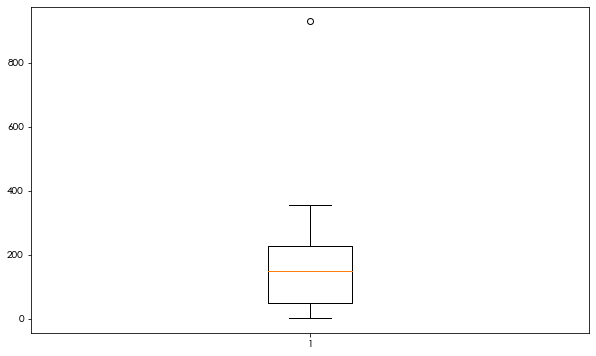

In [34]:
plt.boxplot(test_data['付款金额'])
plt.show()

(array([8., 6., 3., 1., 0., 0., 0., 0., 0., 1.]),
 array([  2.   ,  94.668, 187.336, 280.004, 372.672, 465.34 , 558.008,
        650.676, 743.344, 836.012, 928.68 ]),
 <BarContainer object of 10 artists>)

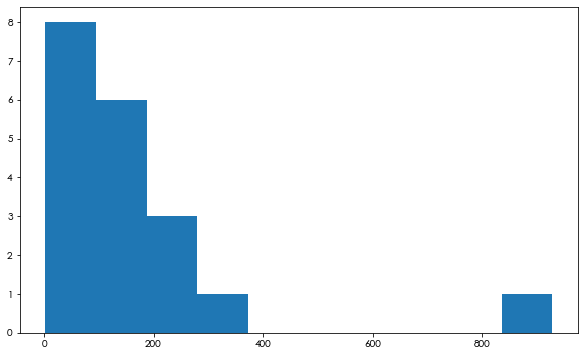

In [35]:
plt.hist(test_data['付款金额'])

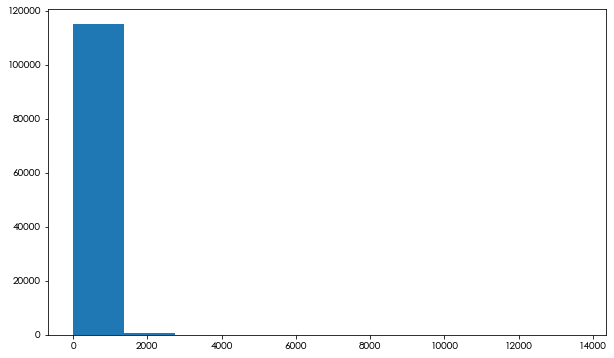

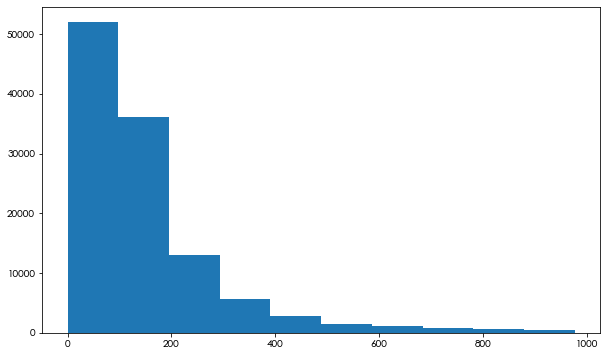

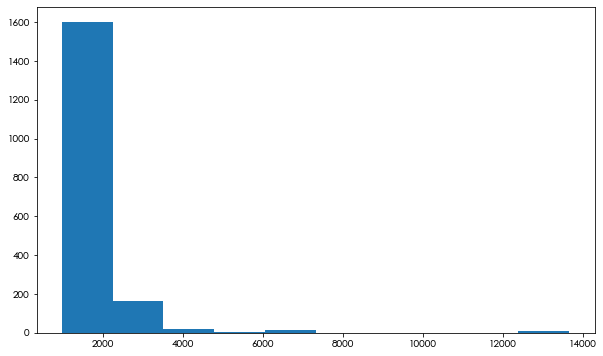

In [36]:
# 读取练习数据，文件路径为'./工作/data.csv'，编码格式为'utf-8'
test_data = pd.read_csv('data.csv', encoding = 'utf-8')
# 1. 用 plt.hist() 对其中的付款金额字段画出直方图
plt.hist(test_data['付款金额'])
plt.show()
# 根据 3σ 规则找到其中的正常值和异常值
price_sorted = sorted(test_data["付款金额"])
# 计算出阈值
m = test_data['付款金额'].mean()
std = test_data['付款金额'].std()
threshold = m + 3 * std
# 定义列表分别存储正常值和异常值
price_normal = []
price_outlier = []
# 遍历数据集，与阈值进行比较，获得正常值和异常值两组数据
for price in price_sorted:
    if price < threshold:
        price_normal.append(price)
    else:
        price_outlier.append(price)
# 绘制正常值的直方图
plt.hist(price_normal)
plt.show()
# 绘制异常值的直方图
plt.hist(price_outlier)
plt.show()

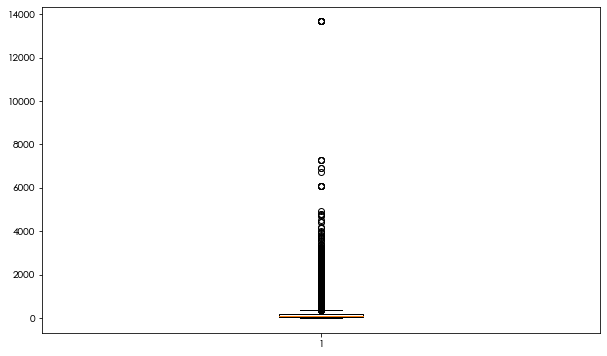

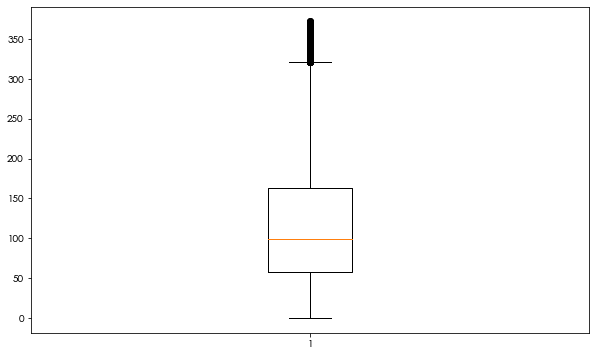

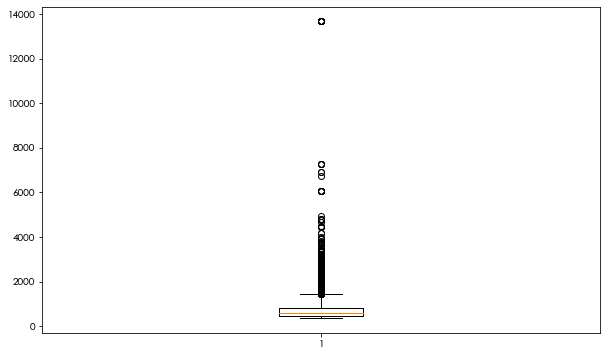

In [37]:
# 读取练习数据，文件路径为'./工作/data.csv'，编码格式为'utf-8'
test_data = pd.read_csv('data.csv', encoding = 'utf-8')
# 2. 用 plt.boxplot() 对其中的付款金额字段画出箱图
plt.boxplot(test_data['付款金额'])
plt.show()
# 根据 1.5IQR 规则找到其中的正常值和异常值
Q1 = test_data['付款金额'].quantile(0.25)
Q3 = test_data['付款金额'].quantile(0.74)
IQR = Q3 - Q1
df_box_normal = test_data[(test_data['付款金额'] > (Q1 - 1.5 * IQR)) & (test_data['付款金额'] <( Q3 + 1.5 * IQR))]['付款金额']
df_box_outlier = test_data[(test_data['付款金额'] < (Q1 - 1.5 * IQR)) | (test_data['付款金额'] > (Q3 + 1.5 * IQR))]['付款金额']
# 画出正常集的箱图
plt.boxplot(df_box_normal)
plt.show()
# 画出异常集的箱图
plt.boxplot(df_box_outlier)
plt.show()

In [38]:
# 读取练习数据，文件路径为'./工作/multiple_date_convert.csv'，编码格式为'utf-8'
test_data = pd.read_csv('multiple_date_covert.csv', encoding = 'utf-8')
# 查看各字段的类型
test_data.info()
# 将其中所有属于时间格式的字段的类型转换成日期类型
test_data = test_data.astype({
    '登录时间' : 'datetime64',
    '加购物车时间' : 'datetime64',
    '订单时间' : 'datetime64'
})
# 再次查看各字段的类型
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     24 non-null     object 
 1   顾客ID    24 non-null     object 
 2   登录时间    24 non-null     object 
 3   加购物车时间  24 non-null     object 
 4   订单时间    24 non-null     object 
 5   付款金额    24 non-null     float64
 6   商品ID    24 non-null     object 
 7   商品描述    24 non-null     object 
dtypes: float64(1), object(7)
memory usage: 7.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单号     24 non-null     object        
 1   顾客ID    24 non-null     object        
 2   登录时间    24 non-null     datetime64[ns]
 3   加购物车时间  24 non-null     datetime64[ns]
 4   订单时间    24 non-null     datetime64[ns]
 5   付款金额    24 non-null     float64       
 6   商

In [39]:
test_data['登录时间'].dt.weekday

0         0.0
1         0.0
2         0.0
3         1.0
4         2.0
         ... 
115873    NaN
115874    NaN
115875    NaN
115876    NaN
115877    NaN
Name: 登录时间, Length: 115878, dtype: float64

In [40]:
import pandas as pd  
# 建立一个 dataframe 
df = pd.DataFrame({"A":[4,4,5,4],
                  "B":[5,5,3,2],
                  "C":[10,10,10,3]})
# 找到每一列的众数
df.mode()

,A,B,C
0,4,5,10


In [41]:
import pandas as pd 
s = pd.Series([1, 1, 1, 1, 3, 3, 3, 3, 5, 5, 5, 5])
x = s.mode()
print('x 是\n {}'.format(x))
print('第一个众数是 {}'.format(x[0]))

x 是
 0    1
1    3
2    5
dtype: int64
第一个众数是 1


In [42]:
import pandas as pd  
# 建立一个 dataframe
df = pd.DataFrame({"A": [10, 18, 11],
                  "B": [13, 15, 8],
                  "C": [9, 20, 3]})
# 计算每一列的标准差
df.std()

A    4.358899
B    3.605551
C    8.621678
dtype: float64

In [43]:
# 导入所需要的库
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 设置中文字体
plt.rcParams['font.family'] = ['HeiTi TC']
# 读取数据集
df = pd.read_csv('clean_data.csv')
# 取 2017 年和 2018 年的数据
df = df[(df['年份'] == 2017) | (df['年份'] == 2018)]


In [44]:
df['订单时间'] = df['订单时间'].astype('datetime64')

In [45]:
df['星期几'] = df['订单时间'].dt.weekday

In [46]:
df['星期几'] = df['星期几'] + 1

In [47]:
# 1. 计算'付款金额'字段的平均数
avg = df['付款金额'].mean()
print('付款金额的平均数是{}'.format(avg))
# 2. 计算'付款金额'字段的众数
most = df['付款金额'].mode()[0]
print('付款金额的众数是{}'.format(most))
# 3. 计算'付款金额'字段的标准差
st = df['付款金额'].std()
print('付款金额的标准差是{}'.format(st))
# 4. 计算'付款金额'字段的值域
ran = df['付款金额'].max() - df['付款金额'].min()
print('付款金额的值域是{}'.format(ran))

付款金额的平均数是134.27945089691013
付款金额的众数是50.0
付款金额的标准差是115.32617543947379
付款金额的值域是751.36


In [48]:
df['商品描述'].value_counts().sum()

95829

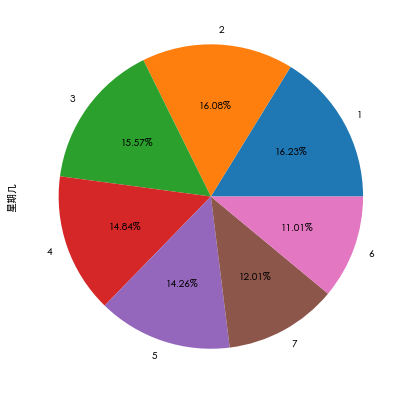

In [49]:
# 数一数'星期几'中每一类出现了几次，即'星期几'中每一类卖出了多少件商品
weekday_count = df['星期几'].value_counts()
# 求出商品的总件数
sum_count = df['星期几'].value_counts().sum()
# 用每一类包含的商品件数 / 商品的总件数，得出一个 list，其中每个元素代表各类销售量所占的比例
weekday_count_ratio = weekday_count / sum_count
# 画出饼图
weekday_count_ratio.plot(kind = 'pie', autopct = '%.2f%%',figsize = (7,7))
plt.show()

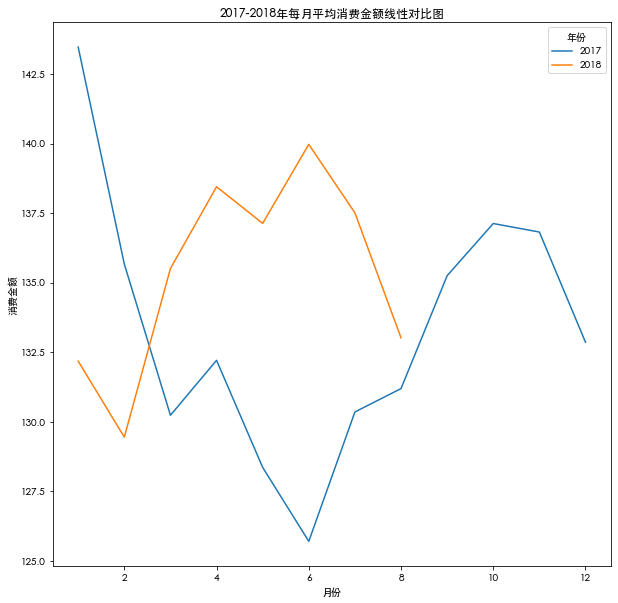

In [50]:
# 分组聚合得到每年每月的付款金额的平均值
df_mean = df.groupby(['年份', '月份'])['付款金额'].mean()
# 将上面得到的多级索引 Series 对象转换成 DataFrame 对象
year_month_sales_mean = df_mean.unstack(level=0)
# 画出折线图
year_month_sales_mean.plot(kind='line', figsize=(10, 10))
# 设置x轴标签
plt.xlabel('月份')   
# 设置y轴标签   
plt.ylabel('消费金额')   
# 设置图片标题
plt.title('2017-2018年每月平均消费金额线性对比图')   
plt.show()


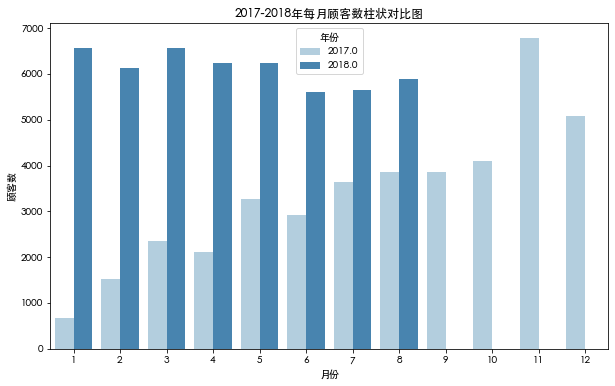

In [51]:
# 导入 seaborn 库
import seaborn as sns
# 1. 分组聚合得到 2017 年各个月份的消费用户数和消费金额总和
# 先挑出数据集中年份是 2017 年的数据
df_2017 = df[df['年份'] == 2017]
# 分组聚合得到每个月中每个顾客的付款金额总和，并对年份求平均
df_2017_month_customer = df_2017.groupby(['月份','顾客ID']).agg({'付款金额':'sum', '年份':'mean'})
# 对上述结果进行行索引重置，转换成 dataframe
df_2017_month_customer = df_2017_month_customer.reset_index()
# 在 df_2017_month_customer 的基础上，分组聚合得到每个月的顾客数、付款金额总和，并对年份求平均
df_2017_month = df_2017_month_customer.groupby('月份').agg({'顾客ID':'count','付款金额':'sum','年份':'mean'})
# 对上述结果进行行索引重置，转换成 dataframe
customers_payment_2017 = df_2017_month.reset_index()
# 2. 用和上面同样的步骤，分组聚合得到 2018 年各个月份的消费用户数和消费金额总和
# 先挑出数据集中年份是 2018 年的数据
df_2018 = df[df['年份'] == 2018]
# 分组聚合得到每个月中每个顾客的付款金额总和，并对年份求平均
df_2018_month_customer = df_2018.groupby(['月份','顾客ID']).agg({'付款金额':'sum', '年份':'mean'})
# 对上述结果进行行索引重置，转换成 dataframe
df_2018_month_customer = df_2018_month_customer.reset_index()
# 在 df_2018_month_customer 的基础上，分组聚合得到每个月的顾客数、付款金额总和，并对年份求平均
df_2018_month = df_2018_month_customer.groupby('月份').agg({'顾客ID':'count','付款金额':'sum','年份':'mean'})
# 对上述结果进行行索引重置，转换成 dataframe
customers_payment_2018 = df_2018_month.reset_index()
# 用 append 将 2017 年和 2018 年数据整合到一个 dataframe 里
customers_payment_all = customers_payment_2017.append(customers_payment_2018).reset_index(drop=True)
# 设置画布大小
plt.rcParams['figure.figsize'] = 10, 6
# 作柱状图表示 2017-2018 年各个月份顾客数的趋势
sns.barplot(x = '月份', y = '顾客ID', data = customers_payment_all, palette = 'Blues', hue = '年份')
# 设置 x 轴标签
plt.xlabel('月份')   
# 设置 y 轴标签   
plt.ylabel('顾客数')   
# 设置图片标题
plt.title('2017-2018年每月顾客数柱状对比图') 
plt.savefig('2017-2018年每月顾客数柱状对比图.jpg',dpi = 300)

In [52]:
# 导入所需要的包
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# 导入 seaborn
import seaborn as sns
# 设置字体  
plt.rcParams['font.family'] = ['HeiTi TC']
# 设置画布大小 
plt.rcParams['figure.figsize'] = 10, 6
# 读取数据
df = pd.read_csv('clean_data.csv')
# 只保留 2017 年和 2018 年的数据
df = df[(df['年份']==2017) | (df['年份']==2018)]
df.head()

,订单号,顾客ID,订单时间,付款金额,商品ID,商品描述,年份,月份,日期,星期几
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,18.12,87285b34884572647811a353c7ac498a,housewares,2017,10,2017-10-02 00:00:00,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,2.00,87285b34884572647811a353c7ac498a,housewares,2017,10,2017-10-02 00:00:00,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,18.59,87285b34884572647811a353c7ac498a,housewares,2017,10,2017-10-02 00:00:00,0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:00,37.77,87285b34884572647811a353c7ac498a,housewares,2017,8,2017-08-15 00:00:00,1
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:00,37.77,87285b34884572647811a353c7ac498a,housewares,2017,8,2017-08-02 00:00:00,2


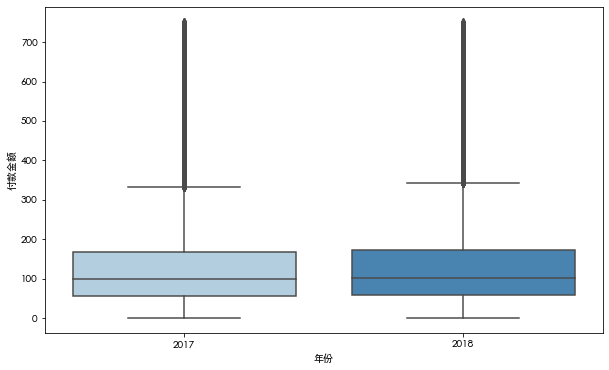

In [53]:
# 绘制 2017 年和 2018 年付款金额的箱图
sns.boxplot(x = '年份', y = '付款金额', data = df, palette = 'Blues')
plt.show()

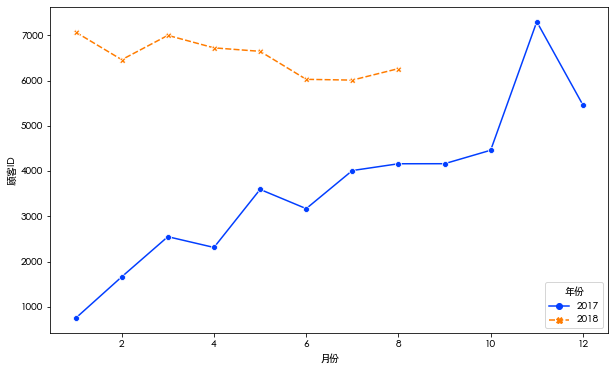

In [54]:
# 首先通过分组聚合出每一年中每个月的顾客ID
# 并将集计得到的结果的行索引进行重置
df_month_customer_list = df.groupby(['年份', '月份'])['顾客ID'].count()
# 对上面得到的 dataframe 分组聚合得到每一年中每个月的顾客总数
# 并将集计得到的结果的行索引进行重置
df_month_customer = df_month_customer_list.reset_index()
# 用 seaborn 画出 2017 年和 2018 年每个月的顾客数的折线对比图
sns.lineplot(x='月份', y='顾客ID',data=df_month_customer, 
            ci=None,
            hue='年份',
            style='年份',
            markers=True,
            dashes=True,
            palette='bright')
plt.show()


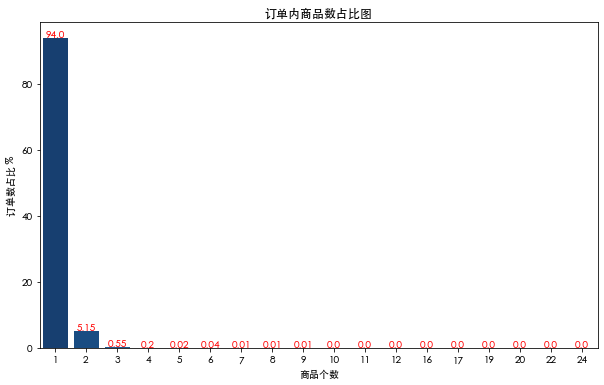

In [55]:

# 分组聚合每个订单内有多少件商品，并重置行索引
df_order_product_count = df.groupby(['订单号'])['商品ID'].count().reset_index()
# 将 商品ID 这个字段重命名为 商品个数
df_order_product_count = df_order_product_count.rename(columns={'商品ID':'商品个数'})
# 分组聚合每个商品个数对应的订单数
product_order_count = df_order_product_count.groupby('商品个数')['订单号'].count()
# 将上述结果除以订单总数，求得百分比，并将结果保留2位小数
product_order_ratio = (product_order_count/len(df_order_product_count)*100).round(3)
# 将上述结果转换成 dataframe，重置行索引，并将'商品ID'重命名为'商品个数', '订单号'重命名为'订单占比'
products_dist = product_order_ratio.to_frame().reset_index().rename(columns={'商品ID':'商品个数', '订单号':'订单占比'})
# 作图显示订单数占比
g = sns.barplot(x='商品个数', y='订单占比', data=products_dist, palette='Blues_r')
# 为柱状图添加刻度，将占比数据显示在每个柱形条的上方，颜色为红色，水平对齐位置居中
for index, row in products_dist.iterrows():
    g.text(row.name, row['订单占比'], round(row['订单占比'],2), color='red', ha="center")
plt.xlabel('商品个数')             # 设置x轴刻度
plt.ylabel('订单数占比 %')         # 设置y轴刻度
plt.title('订单内商品数占比图')     # 设置图片标题
plt.show()


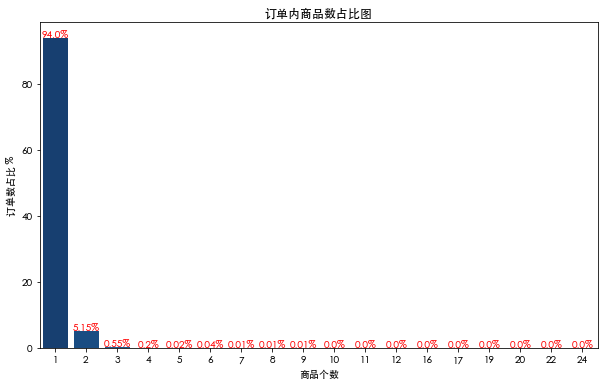

In [56]:
df_each_sum = df.groupby('订单号')['商品ID'].count().reset_index()
df_each_sum = df_each_sum.rename(columns = {'商品ID': '商品个数'})
df_shit = df_each_sum.groupby('商品个数')['订单号'].count()
df_final = (df_shit / len(df_each_sum) * 100).round(3)
df_final = df_final.to_frame().reset_index()
df_final = df_final.rename(columns = {'订单号':'订单占比'})
g = sns.barplot(x='商品个数', y='订单占比', data=df_final, palette='Blues_r')
for index, row in df_final.iterrows():
        g.text(index, row['订单占比'], str(round(row['订单占比'],2)) + '%', color='red', ha="center")
plt.xlabel('商品个数')             # 设置x轴刻度
plt.ylabel('订单数占比 %')         # 设置y轴刻度
plt.title('订单内商品数占比图')     # 设置图片标题
plt.show()